# Preliminaries
## Load data
This section loads the data as discussed in the [Exploratory notebook](Exploratory.ipynb).

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data parameters
data_dir = "../SpeedData"
data_file = "LIV_PAT_457 Velocity Excursion Review.xlsm"
data_sheet = "Event Log & Velocity Listing"
data_cols = [3,6,7,8]
data_skiprows = [0,1,2,3,5]

# tool information
tools = {
    "BHGE_MFL": {
        "degrade": 2.6,
        "blind": 7},
    "ROSEN_MFL_C": {
        "degrade": 3.5,
        "blind": 7},
    "ROSEN_EMAT": {
        "degrade": 2.5,
        "blind": 4}
    }

# data read
pl_raw = pd.read_excel(data_dir + "/" + data_file,
                   sheet_name=data_sheet,
                   usecols=data_cols,
                   names = ["Distance"] + list(tools.keys()),
                   skiprows=data_skiprows)
pl_raw = pl_raw[pl_raw.duplicated(["Distance", "BHGE_MFL"]) != True]

## Transform data to long format
Long format data is easier to plot using the Seaborn library. Each row of the dataframe corresponds to a unique (Distance, Tool) combination.

In [2]:
pl = pd.melt(pl_raw,
                 ["Distance"],
                 var_name="Tool",
                 value_name="Velocity")
pl["Tool"] = pl["Tool"].astype('category')

# Plot velocity profile
The following plots the velocity of the three tools in the LIV_PAT_457 pipeline.

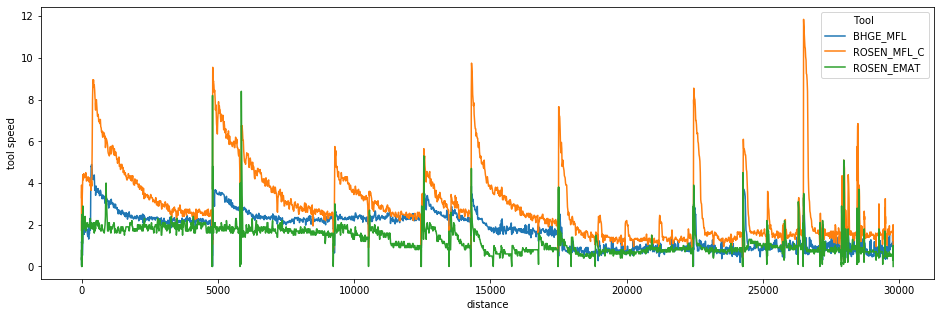

In [3]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x="Distance", y="Velocity", hue="Tool", data=pl)
ax.set(xlabel="distance", ylabel="tool speed")
plt.show()

## Zoom based on distance
Here, a new dataframe called `pl_zoom` is created by specifying and upper and lower bound on distance.  This allows us to zoom in on a section of the pipeline.

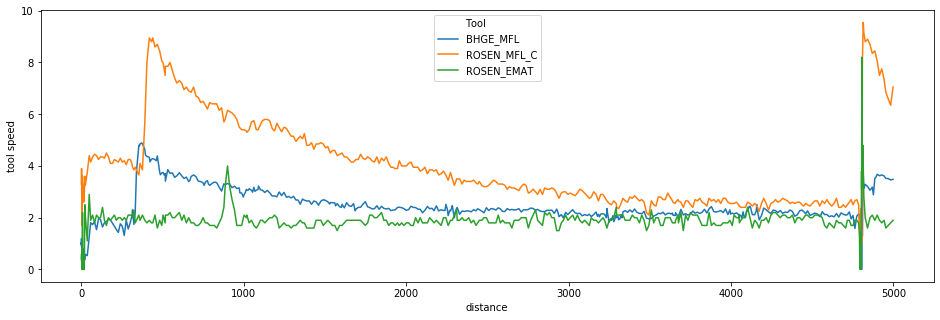

In [4]:
dist_min = 0
dist_max = 5000

pl_zoom = pl[(pl.Distance >= dist_min) & (pl.Distance <= dist_max)]
plt.figure(figsize=(16,5))
ax = sns.lineplot(x="Distance", y="Velocity", hue="Tool", data=pl_zoom)
ax.set(xlabel="distance", ylabel="tool speed")
plt.show()

__Conclusions:__ Although we see significant concordance between the three tools when we look at the entirety of the LIV_PAT_457 pipeline, the concordance is not nearly as clean when we zoom in.  For example, in the distance range \[0, 5,000m\], we see the following:
* a peak in ROSEN_MFL_C without a corresponding excursion for EMAT (at the &plusmn;500m mark)
* a small peak in EMAT with no corresponding peak for the ROSEN_MFL_C
* different transient behaviors for the three tools